In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


mnist = tf.keras.datasets.mnist



Using TensorFlow backend.


In [5]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [7]:
#conv layers
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (28,28,1), activation = 'relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#conv layer 
model.add(Conv2D(32,(3,3), activation = 'relu'))
#Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))

#conv layer 
model.add(Conv2D(64,(3,3), activation = 'relu'))
#Pooling  
model.add(MaxPooling2D(pool_size=(2, 2)))

In [8]:
#fully connected layers
model.add(Flatten())  
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

In [11]:
#model.fit(x_train, y_train, epochs=1)
model.fit(X_train, Y_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 139s 2ms/step - loss: 0.2382 - acc: 0.9269


In [12]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 12s 1ms/step


[0.09941067232862115, 0.9696]

In [13]:
#training and evaluation done...now inference

In [14]:
#inference

In [15]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
test_image=X_test[100].reshape(28,28)

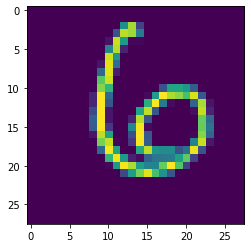

In [17]:
plt.imshow(test_image.reshape(28,28))

In [18]:
test_image = image.img_to_array(test_image)

In [19]:
#predict expect a batch of images...we add a dummy dimension
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [20]:
result

array([[9.6202770e-05, 6.8196897e-07, 2.1210303e-08, 3.5073178e-10,
        1.8231241e-05, 1.0083987e-05, 9.9986708e-01, 2.7303781e-09,
        5.6850890e-06, 1.9615745e-06]], dtype=float32)

In [21]:
np.around(result)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [22]:
(np.around(result)).argmax()

6